In [172]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results




In [173]:
RANDOM_SEED = 1

In [174]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split the data into training and test sets
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize # to adjust thresholds
from sklearn.naive_bayes import BernoulliNB #bernoulli 
import statsmodels.api as sm #to print report
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [175]:
# initial work with the smaller data set
bank = pd.read_csv('/Users/honpro/2. Term Deposits/bank.csv', sep = ';')



In [176]:
# examine the shape of original input data
print(bank.shape)

# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()


#######################################################
#Data has 4521 observations across 17 variables(columns)
#missing values are removed.
#variable values are a mix of numeric and character values.
#response variable is Yes/No
#######################################################


(4521, 17)
(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [177]:
bank.describe()

##########
#Initial review of data.  ranges are different for all variables. If all variables were used,  scaling would be needed
########

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


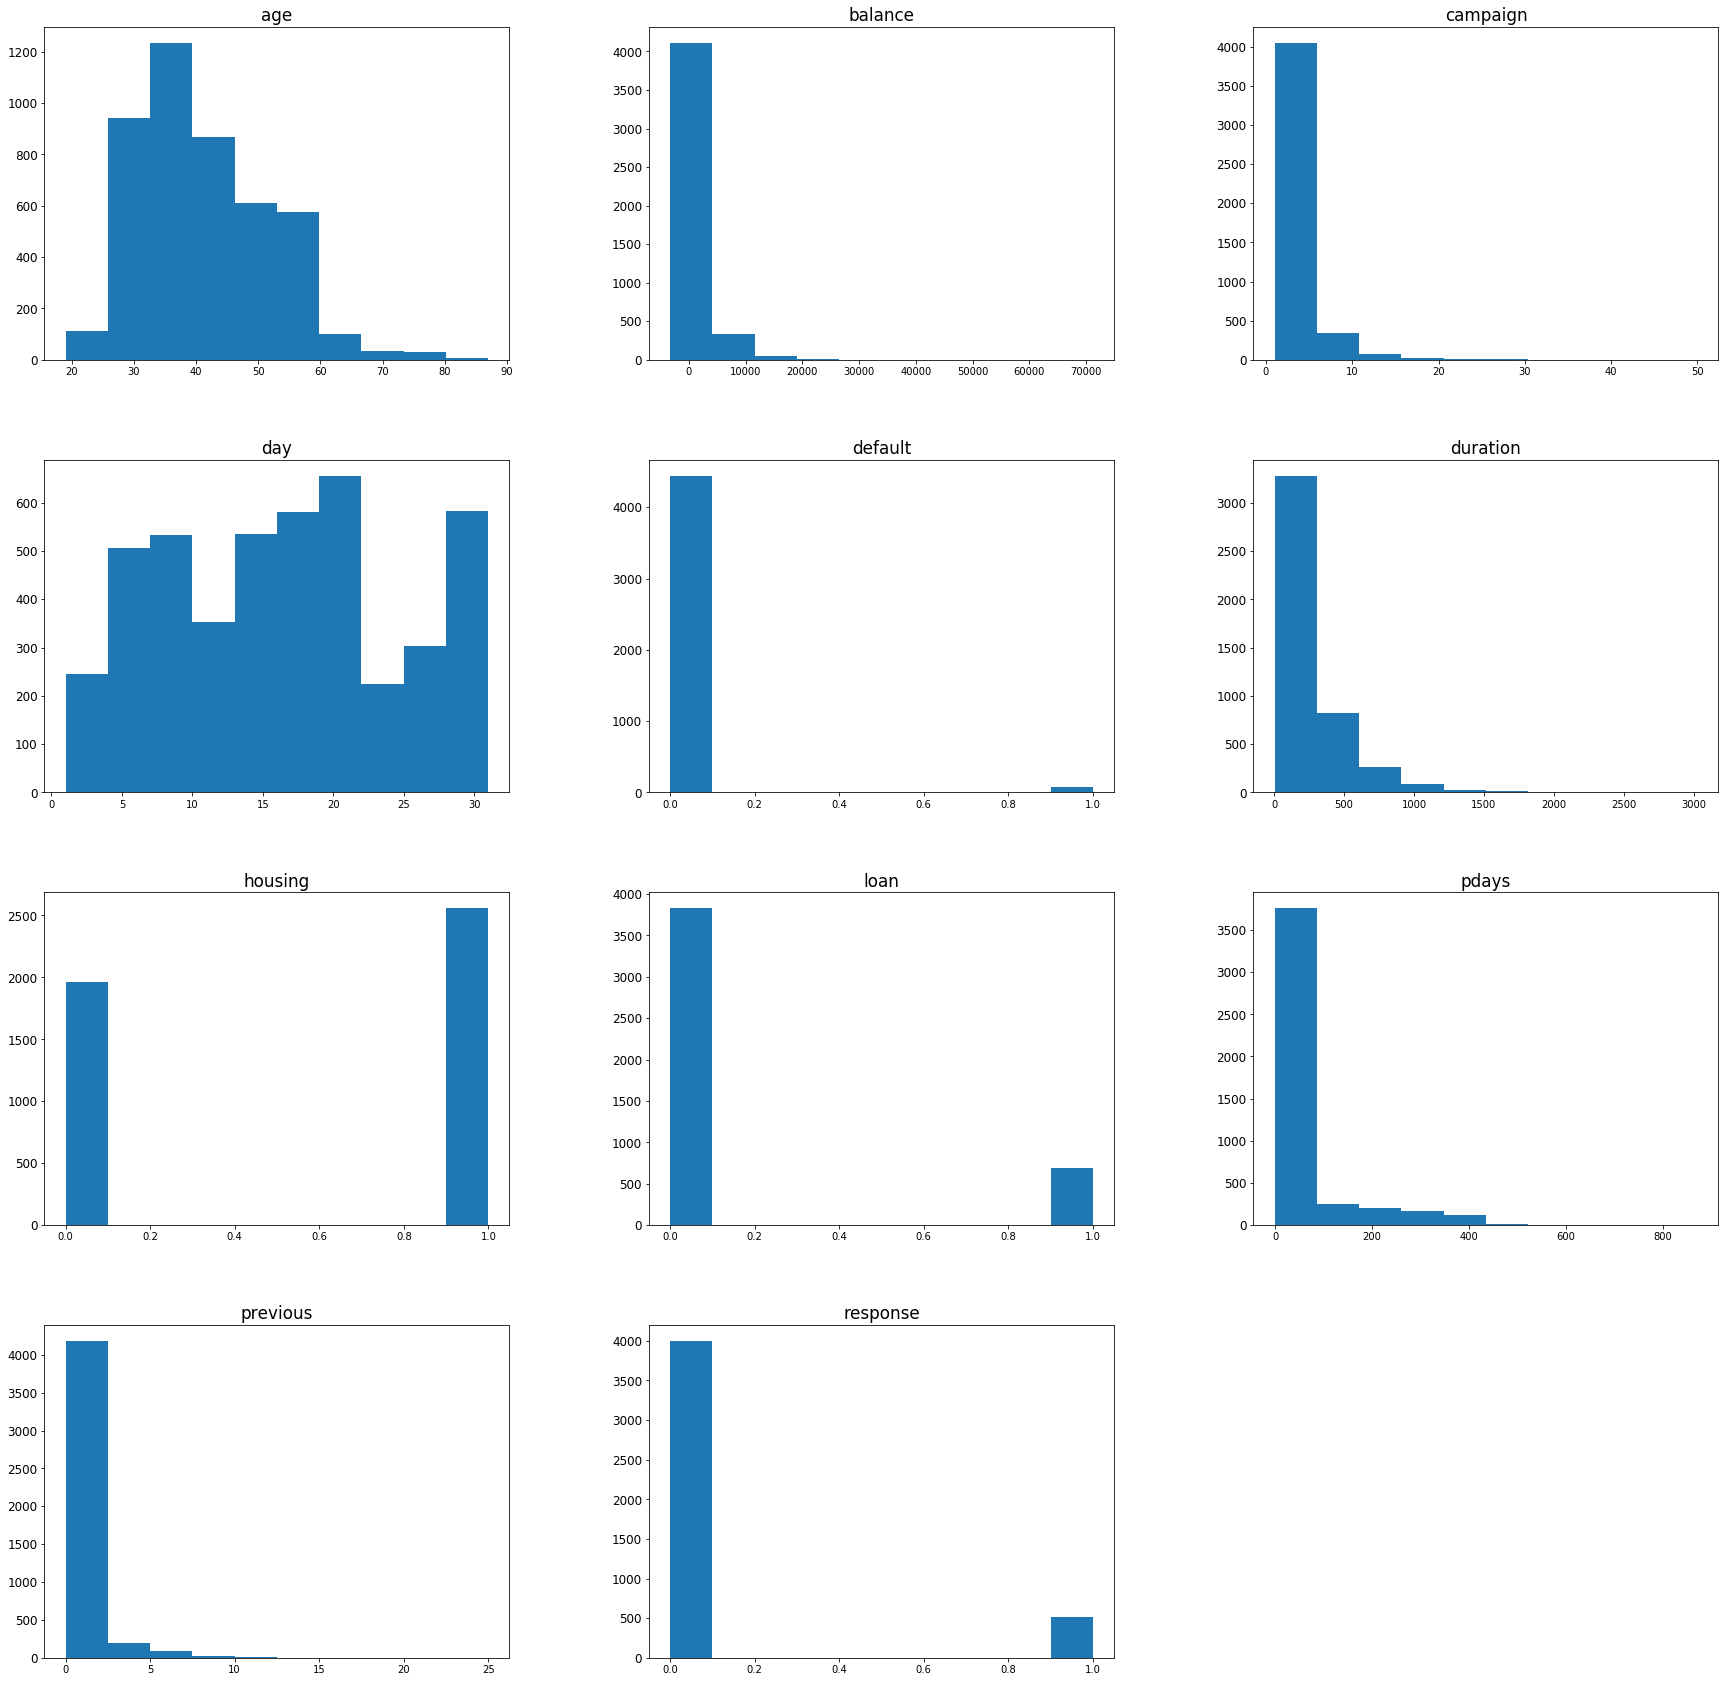

In [199]:
bank.hist(grid=False, xlabelsize = 10, ylabelsize=12, figsize=(30,30))

plt.ylabel("Counts", fontsize = 15)
plt.savefig('overalldistribution.pdf', 
bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
orientation='portrait', papertype=None, format=None, 
transparent=True, pad_inches=0.25, frameon=None) 

#####
#Overall distribution of all variables.  Some are categorical with 1/0 for Yes/No's, others are continuous.
#Scaling would be required if all variables were used to model.
#####

In [180]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

model_data[0:10]


(4521, 4)


array([[0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0]])

In [181]:
# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

bank['default'] = bank['default'].map(convert_to_binary)
bank['housing']=bank['housing'].map(convert_to_binary)
bank['loan']=bank['loan'].map(convert_to_binary)
bank['response'] = bank['response'].map(convert_to_binary)

########
#converted required variables to 0/1
#######


In [182]:
bank1 = bank[['default', 'housing', 'loan', 'response']]
#X = model_data[:,0:2]
#y = model_data[:,3]

########
#recreated data set with the 3 required independent variables + response variables
########


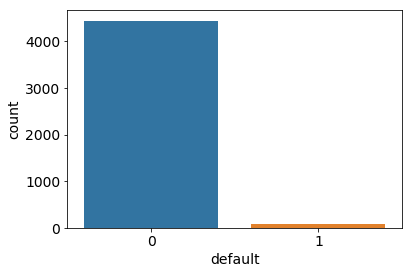

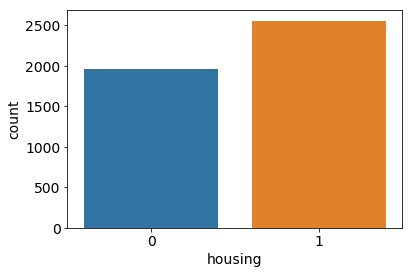

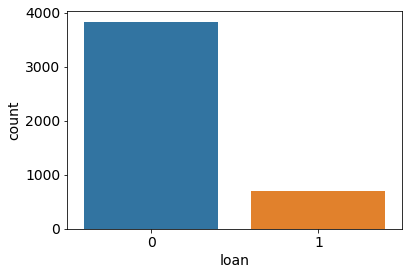

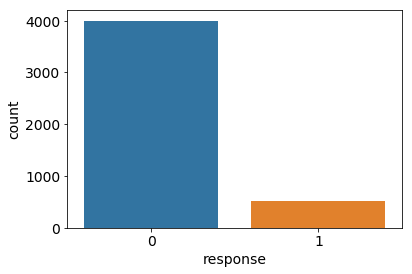

In [197]:
#######
#Data exploration
#######
#bank1['response'].value_counts()
#sns.countplot(x='response', data=bank1, palette='hls')
#plt.xlabel('Response')
#plt.ylabel('frequency')
#plt.title('Response distribution')
#plt.show()

for i in bank1:
    sns.countplot(bank1[i])

    plt.show()

##########
#Data is heavily imbalanced.
#Default Rate is low
#Housing is fairly balanced
#Most do not have loan
#Response rate is also very low
############





In [184]:
#Seperate response and features
X = bank1.drop('response', axis = 1)
y = bank1['response']

########
#seperate the independent variables into X's an y's.
########

In [185]:
#train split test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = RANDOM_SEED)

########
#split data to train/test split,  Seed = 1,  80% for training, 20% for testing
########

Logistic Regression

In [186]:
#Create logistic regression model
logmodel = LogisticRegression()

######
#Create instance of logistic model
######

In [187]:

model= logmodel.fit(X_train, y_train)
print(model)
#####
#Fit and print the model
#######


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
logit = sm.Logit(y,X)
result=logit.fit()
print(result.summary())
#coefficients
#model.coef_

#########
#Print statistic summary
#model results show default variable may not be significant.  housing and loan are siginicant.
#coeficcient shows log odds.
#Holding all variables constant,  housing variable has a slightly higher influence, as compared to loan amount
#########

Optimization terminated successfully.
         Current function value: 0.442227
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4518
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 Jul 2019   Pseudo R-squ.:                 -0.2376
Time:                        21:35:31   Log-Likelihood:                -1999.3
converged:                       True   LL-Null:                       -1615.5
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
default       -0.6207      0.387     -1.605      0.108      -1.378       0.137
housing       -2.1992      0.

In [189]:
#Reviewing training set results
y_train_predict = logmodel.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_predict)
print(cm_train)
training_score = accuracy_score(y_train, y_train_predict)


print('Initial training accuracy score is {0:.2%}'.format(training_score))


[[3210    0]
 [ 406    0]]
Initial training accuracy score is 88.77%


In [190]:
y_train_predict_prob = logmodel.predict_proba(X_train)
y_train_predict_prob[0:10]

#######
#Rather than outputting the results as class factors outputting the results as probabilityies.
#First column shows probability of getting 0.  second column shows probability of getting a 1.
#######

array([[0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.89823886, 0.10176114],
       [0.91089983, 0.08910017],
       [0.83699615, 0.16300385],
       [0.83699615, 0.16300385],
       [0.83699615, 0.16300385]])

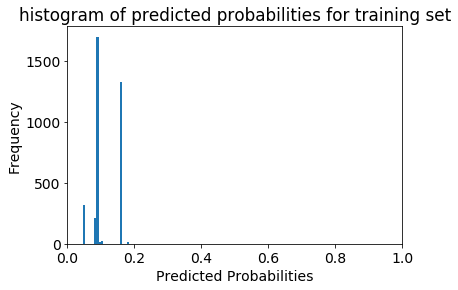

In [192]:
plt.hist(y_train_predict_prob[:,1], bins = 20)
plt.xlim(0,1)
plt.title('histogram of predicted probabilities for training set')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.savefig('Training_probaility.pdf')

########
#Inspecting the probaiblity results, most predicted probabilities fall below 20%.  With a default threshold of 50%,
#this explains the high accuracy rate
#########

In [151]:
#####
#Adjust the threshold to 10%
#######
y_train_predict = binarize(y_train_predict_prob, .1)[:,1]
y_train_predict_prob[0:10]
y_train_predict[0:10]

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [152]:
##Rerun confusion matrix with new threshold
cm_train = confusion_matrix(y_train, y_train_predict)
print(cm_train)

[[2064 1146]
 [ 179  227]]


In [153]:
#Updated Accuracy Rate
training_score = accuracy_score(y_train, y_train_predict)

print('Updated training accuracy score is {0:.2%}'.format(training_score))


Updated training accuracy score is 63.36%


Running on Test Set

In [154]:
y_test_pred_class = logmodel.predict(X_test)
y_test_pred_class[0:10]


########
#Testing on the 20% Test set and outputing the first 10 results
#######


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [155]:
score = accuracy_score(y_test, y_test_pred_class)
print('Initial accuracy score is {0:.2%}'.format(score))
#######
#Initial results shows roughly 87.29%.  This is prior to adjusting the threshold
########

Initial accuracy score is 87.29%


In [156]:
y_test_pred_prob = logmodel.predict_proba(X_test)
y_test_pred_prob[0:10]

#######
#Outputting results as probabilities
#######

array([[0.91422181, 0.08577819],
       [0.91422181, 0.08577819],
       [0.91089983, 0.08910017],
       [0.83699615, 0.16300385],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.83699615, 0.16300385],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017],
       [0.91089983, 0.08910017]])

In [157]:
%matplotlib inline
plt.rcParams['font.size'] = 14


Text(0, 0.5, 'Frequency')

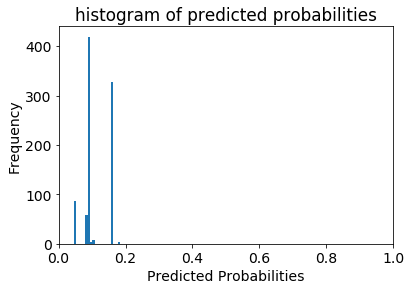

In [158]:
plt.hist(y_test_pred_prob[:,1], bins = 20)
plt.xlim(0,1)
plt.title('histogram of predicted probabilities')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')

########
#Inspecting the probaiblity results.  It is also skewed with most probabilities < 20%

In [159]:
y_test_pred_class = binarize(y_test_pred_prob, .1)[:,1]

#######
#Adjusting threshold to 10%
#######


In [160]:
y_test_pred_class[0:10]

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

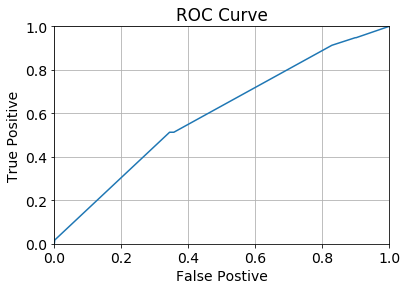

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Postive')
plt.ylabel('True Positive')
plt.savefig('ROC.pdf')
plt.grid(True)

#####
#Plotting ROC curve with test set.
######



In [162]:
AUC_Score = roc_auc_score(y_test, y_test_pred_prob[:,1])
print('AUC score is around {0:.2%}'.format(AUC_Score))

####
#AUC score is almost 60% towards at the 10% threshold
#####

AUC score is around 59.75%


In [163]:
print(accuracy_score(y_test, y_test_pred_class))



0.6298342541436464


In [164]:
print(confusion_matrix(y_test, y_test_pred_class))

[[511 279]
 [ 56  59]]


In [165]:
print(classification_report(y_test, y_test_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       790
           1       0.17      0.51      0.26       115

   micro avg       0.63      0.63      0.63       905
   macro avg       0.54      0.58      0.51       905
weighted avg       0.81      0.63      0.69       905



Naive Bayes

In [166]:
Bern=BernoulliNB(binarize=0.0)


In [167]:
Bern.fit(X_train, y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [168]:
Bern_predict_class = Bern.predict(X_test)
Bern_predict_class[0:10]
Bern_predict_prob = Bern.predict_proba(X_test)
Bern_predict_prob[0:10]
Bern_predict_class = binarize(Bern_predict_prob, .1)[:,1]

#Bernoulli

In [169]:
confusion_matrix(y_test,Bern_predict_class)

array([[511, 279],
       [ 56,  59]])

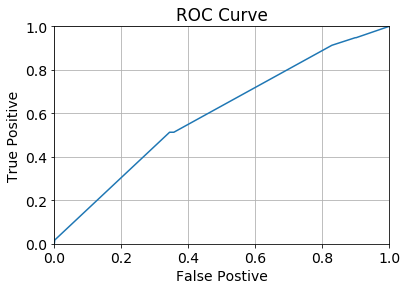

In [194]:
fpr, tpr, thresholds = roc_curve(y_test, Bern_predict_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Postive')
plt.ylabel('True Positive')
plt.savefig('Bernoulli.pdf')
plt.grid(True)

#####
#Plotting ROC curve with test set.
######

In [171]:
cross_val_score(logmodel, X_train, y_train, cv=10)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.88674033, 0.88674033, 0.88674033, 0.88674033, 0.88674033,
       0.88674033, 0.88919668, 0.88919668, 0.88919668, 0.88919668])